Trajectory inference for 3dpi

In [ ]:
!mkdir -p GSM5082292_3dpi

In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

  Using cached igraph-1.0.0-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (4.4 kB)
Using cached igraph-1.0.0-cp39-abi3-manylinux_2_28_x86_64.whl (5.7 MB)
  Attempting uninstall: igraph
    Found existing installation: igraph 0.11.9
    Uninstalling igraph-0.11.9:
      Successfully uninstalled igraph-0.11.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
louvain 0.8.2 requires igraph<0.12,>=0.10.0, but you have igraph 1.0.0 which is incompatible.
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
  Attempting uninstall: igraph
    Found existing installation: igraph 1.0.0
    Uninstalling igraph-1.0.0:
      Successfully uninstalled igraph-1.0.0
ERROR: pip's dependency resolver does not currently take into account all 

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE166nnn/GSE166766/suppl/GSE166766_RAW.tar -O GSE166766_RAW.tar
!tar -xvf GSE166766_RAW.tar
!mv GSM5082292_3dpi_barcodes.tsv.gz GSM5082292_3dpi/barcodes.tsv.gz
!mv GSM5082292_3dpi_features.tsv.gz GSM5082292_3dpi/features.tsv.gz
!mv GSM5082292_3dpi_matrix.mtx.gz GSM5082292_3dpi/matrix.mtx.gz

--2025-12-08 09:29:54--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE166nnn/GSE166766/suppl/GSE166766_RAW.tar
           => ‘GSE166766_RAW.tar’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE166nnn/GSE166766/suppl ... done.
==> SIZE GSE166766_RAW.tar ... 838123520
==> PASV ... done.    ==> RETR GSE166766_RAW.tar ... done.
Length: 838123520 (799M) (unauthoritative)

GSE166766_RAW.tar   100%[===================>] 799.30M  80.0MB/s    in 11s     

2025-12-08 09:30:05 (75.4 MB/s) - ‘GSE166766_RAW.tar’ saved [838123520]

GSM5082289_mock_barcodes.tsv.gz
GSM5082289_mock_features.tsv.gz
GSM5082289_mock_matrix.mtx.gz
GSM5082290_1dpi_barcodes.tsv.gz
GSM5082290_1dpi_features.tsv.gz
GSM5082290_1dpi_matrix.mtx.gz
GSM5082291_2dpi_

In [ ]:
import scanpy as sc
adata3= sc.read_10x_mtx('/content/GSM5082292_3dpi')

In [ ]:
adata3.obs.head()

In [ ]:
adata3.X


In [ ]:
adata3.shape


In [ ]:
adata3.to_df()

In [ ]:
adata3.var["MT"]= adata3.var_names.str.startswith("MT-")

In [ ]:
mt_genes = adata3.var_names[adata3.var["MT"]]
mt_genes

In [ ]:
sc.pp.calculate_qc_metrics(adata3, qc_vars=["MT"], inplace=True, log1p=True)

In [ ]:
adata3.obs.head()

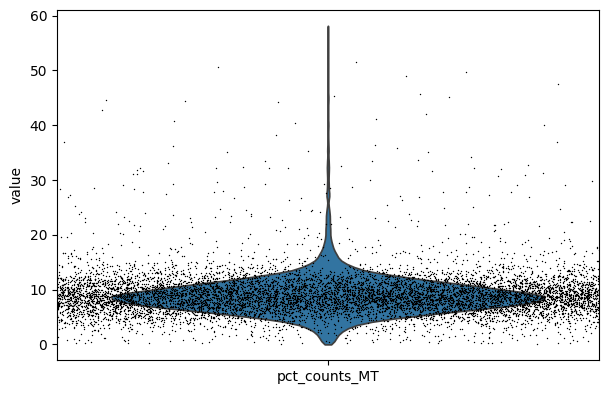

In [ ]:
sc.pl.violin(adata3, "pct_counts_MT", jitter= 1.5, multi_panel= False)

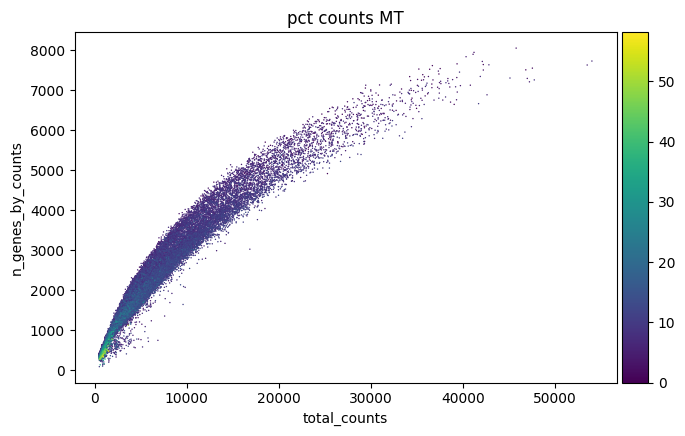

In [ ]:
sc.pl.scatter(adata3, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")

In [ ]:
#remove high Mt genes
adata3= adata3[adata3.obs.pct_counts_MT<10, :]
adata3.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT
AAACCCACAATGCTCA-1,6353,8.756840,26405.0,10.181347,25.286877,35.171369,44.730165,56.281007,1257.0,7.137279,4.760462
AAACCCACACAACATC-1,2149,7.673223,4984.0,8.514189,32.985554,39.767255,48.314607,62.861156,401.0,5.996452,8.045747
AAACCCACAGAATGTA-1,1745,7.465083,5678.0,8.644530,51.461782,59.598450,66.872138,78.073265,405.0,6.006353,7.132793
AAACCCACATAATCGC-1,4932,8.503703,19512.0,9.878837,29.463920,38.924764,49.031365,61.013735,946.0,6.853299,4.848299
AAACCCAGTAGGCAGT-1,1812,7.502738,4549.0,8.422882,33.963508,44.845021,55.198945,70.103319,308.0,5.733341,6.770719


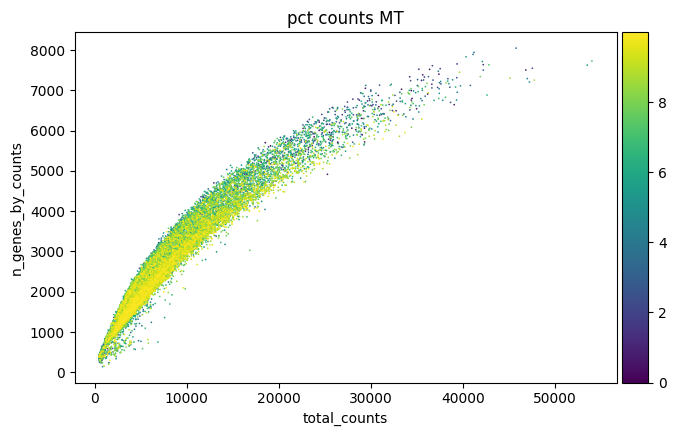

In [ ]:
sc.pl.scatter(adata3, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")

In [ ]:
sc.pp.filter_cells(adata3, min_genes=200)
sc.pp.filter_genes(adata3, min_cells =3)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [ ]:
adata3.layers["counts"] = adata3.X.copy()

In [ ]:
adata3

In [ ]:
# adata3.X = adata3.layers["counts"].copy()


In [ ]:
sc.pp.normalize_total(adata3, target_sum= 1e4)

In [ ]:
sc.pp.sqrt(adata3)

In [ ]:
sc.tl.pca(adata3, n_comps= 100)

In [ ]:
sc.pl.pca_variance_ratio( adata3, n_pcs= 10)

In [ ]:
sc.pp.neighbors(adata3)

In [ ]:
sc.tl.umap(adata3, min_dist= 0.5)


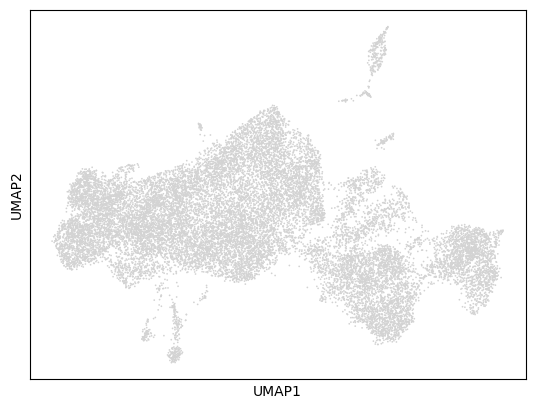

In [ ]:
sc.pl.umap(adata3)

In [ ]:
sc.tl.louvain(adata3, resolution= 0.5)

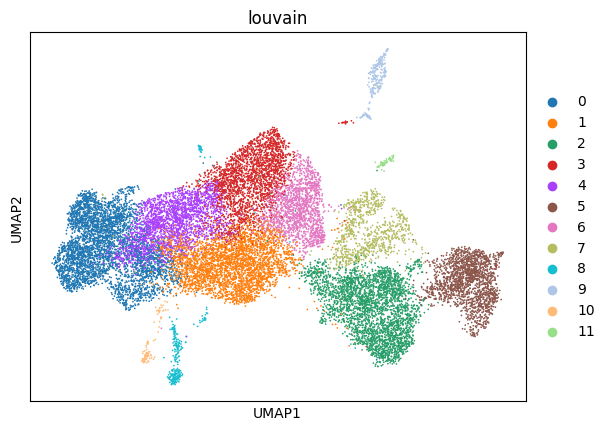

In [ ]:
sc.pl.umap(adata3, color= "louvain")

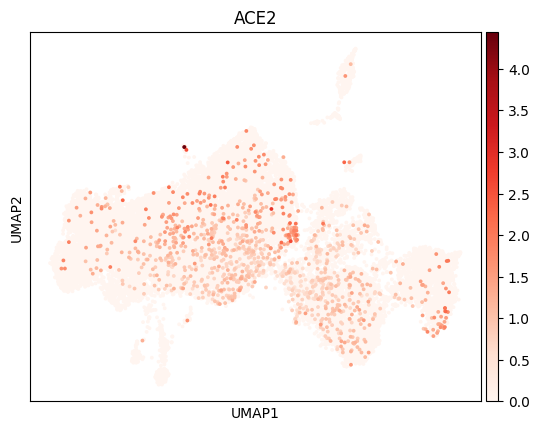

In [ ]:
sc.pl.umap(
    adata3,
    color="ACE2",
    layer=None,   # or "cell_type" after annotation
    cmap='Reds', size= 30
)

In [ ]:
sc.pl.umap(
    adata3,
    color="ENO2",
    layer=None,   # or "cell_type" after annotation
    cmap='Reds', size= 30
)

In [ ]:
sc.pl.umap(
    adata3,
    color="CTSL",
    layer=None,   # or "cell_type" after annotation
    cmap='Reds', size= 30)

In [ ]:
sc.pl.umap(
    adata3,
    color="TMPRSS2",
    layer=None,   # or "cell_type" after annotation
    cmap='Reds', size= 30
)

In [ ]:
sc.pl.umap(
    adata3,
    color="TMPRSS4",
    layer=None,   # or "cell_type" after annotation
    cmap='Reds', size= 30)

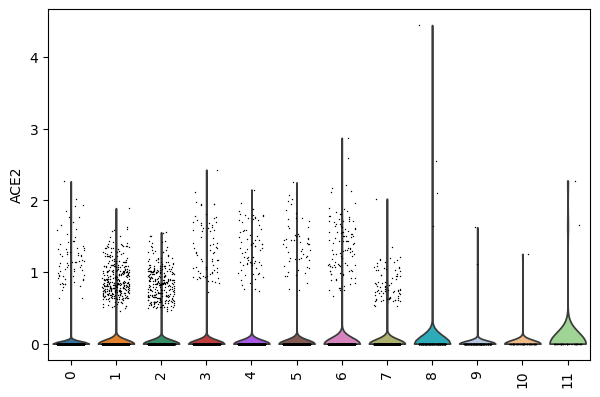

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

sc.pl.violin(adata3, "ACE2", groupby="louvain",  rotation=90, jitter=0.3)
plt.tight_layout()

annotations

In [ ]:
import decoupler as dc

In [ ]:
markers = dc.op.resource(name = "PanglaoDB", organism= "human")
mar3 = markers[markers["organ"]== "Lungs"]
mar3.head()

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
,,,,,,,,,,,,,
18,ABCA3,True,Pulmonary alveolar type II cells,Endoderm,True,0.692308,0.000944,True,0.007576,0.000518,9606,Lungs,0.001
31,ABCD3,True,Pulmonary alveolar type II cells,Endoderm,True,0.000000,0.009437,True,0.340909,0.046722,9606,Lungs,0.041
172,ADGRF5,True,Pulmonary alveolar type II cells,Endoderm,True,0.538462,0.015728,True,0.590909,0.050023,9606,Lungs,0.047
186,ADH7,True,Airway epithelial cells,Endoderm,True,0.000000,0.004386,True,0.000000,0.006288,9606,Lungs,0.006
222,AGER,True,Pulmonary alveolar type I cells,Endoderm,True,0.000000,0.001253,True,1.000000,0.011382,9606,Lungs,0.011


In [ ]:
mar3= mar3[mar3["canonical_marker"]]
mar3= mar3[~mar3.duplicated(["cell_type", "genesymbol"])]
mar3= mar3.rename(columns={'cell_type': 'source', 'genesymbol': 'target'})
mar3 = mar3[["source", "target"]]
mar3.head()

,source,target
,,
18,Pulmonary alveolar type II cells,ABCA3
31,Pulmonary alveolar type II cells,ABCD3
172,Pulmonary alveolar type II cells,ADGRF5
186,Airway epithelial cells,ADH7
222,Pulmonary alveolar type I cells,AGER


In [ ]:
print(adata3.X.shape)
print(mar3.shape)
print(mar3.head())
print(len(set(mar3['target']).intersection(adata3.var_names)))


In [ ]:
adata3.is_view

In [ ]:
dc.mt.ulm( data =adata3, net= mar3, tmin= 3)

In [ ]:
score = dc.pp.get_obsm(adata3, key='score_ulm')
score

AnnData object with n_obs × n_vars = 19744 × 8
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes', 'louvain'
    uns: 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'

In [ ]:
adata3.obsm["score_ulm"].head()

,Airway epithelial cells,Airway goblet cells,Alveolar macrophages,Ciliated cells,Clara cells,Ionocytes,Pulmonary alveolar type I cells,Pulmonary alveolar type II cells
AAACCCACAATGCTCA-1,1.051692,6.715177,1.185024,2.009790,10.543619,-0.826500,1.981507,0.900640
AAACCCACACAACATC-1,0.530792,1.344466,1.291649,-0.479720,2.923298,-0.016374,0.553901,0.445927
AAACCCACAGAATGTA-1,0.988871,1.960942,1.632866,1.265256,3.265862,-0.604662,1.007952,-0.615329
AAACCCACATAATCGC-1,1.578945,11.384558,1.101811,0.235899,11.742129,-0.729902,2.331636,1.334395
AAACCCAGTAGGCAGT-1,-0.499384,0.445804,1.409078,-0.432468,0.325364,-0.706304,1.993373,0.280839


In [ ]:
adata3.obsm["score_ulm"].columns

Index(['Airway epithelial cells', 'Airway goblet cells',
       'Alveolar macrophages', 'Ciliated cells', 'Clara cells', 'Ionocytes',
       'Pulmonary alveolar type I cells', 'Pulmonary alveolar type II cells'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sc.pl.umap(score, color=["louvain", "Ciliated cells"], cmap="RdBu_r")

In [ ]:
#rank genes for the 8 clusters
adata3_rank = dc.tl.rankby_group(score, groupby="louvain", reference= "rest",method= "t-test_overestim_var")
adata3_rank = adata3_rank[adata3_rank["stat"]>0]
adata3_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,2,rest,Ciliated cells,53.851066,2.449928,0.000000e+00,0.000000e+00
1,2,rest,Pulmonary alveolar type II cells,17.904607,0.373364,7.797354e-70,3.118942e-69
3,2,rest,Airway epithelial cells,10.220795,0.226808,2.567141e-24,5.134283e-24
4,2,rest,Alveolar macrophages,8.866032,0.231981,9.936062e-19,1.589770e-18
5,2,rest,Airway goblet cells,6.546251,0.719944,6.427476e-11,8.569968e-11


In [ ]:
cluster_annotations1 = adata3_rank[adata3_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


/tmp/ipython-input-1225239366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations1 = adata3_rank[adata3_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [ ]:
cluster_annotations1

{'2': 'Ciliated cells',
 '10': 'Ionocytes',
 '7': 'Ciliated cells',
 '1': 'Pulmonary alveolar type I cells',
 '5': 'Ciliated cells',
 '6': 'Airway goblet cells',
 '3': 'Clara cells',
 '8': 'Ionocytes',
 '4': 'Airway epithelial cells',
 '9': 'Alveolar macrophages',
 '11': 'Ionocytes'}

In [ ]:
unique_cluster_annotations = {cluster: f"{cell_type}_{cluster}" for cluster, cell_type in cluster_annotations1.items()}
adata3.obs["louvain"] = adata3.obs["louvain"].cat.rename_categories(unique_cluster_annotations)

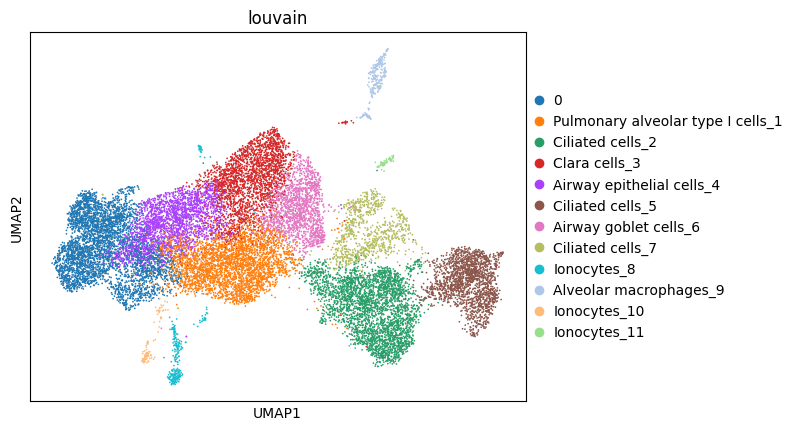

In [ ]:
sc.pl.umap(adata=adata3, color= ["louvain"], ncols= 1)

trajectory inference


In [ ]:
sc.tl.draw_graph(adata3)

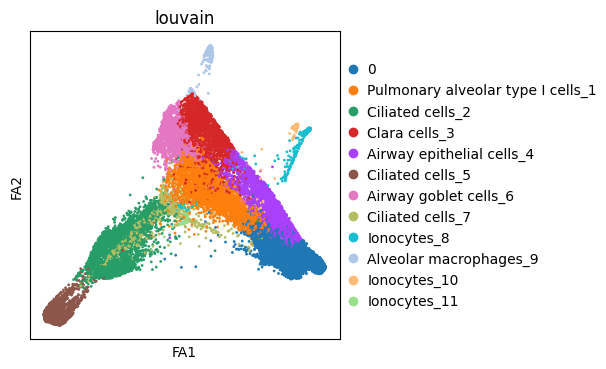

In [ ]:
plt.rcParams["figure.figsize"]= (4,4)
sc.pl.draw_graph(adata3, color= "louvain", size= 16)

In [ ]:
sc.tl.paga(adata3, groups= "louvain")

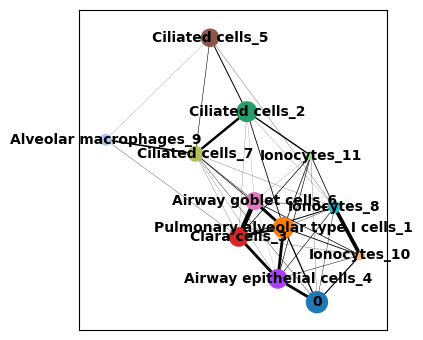

In [ ]:
sc.pl.paga(adata3, color = ["louvain"], show= True)

In [ ]:
sc.tl.draw_graph(adata3, init_pos = "paga")

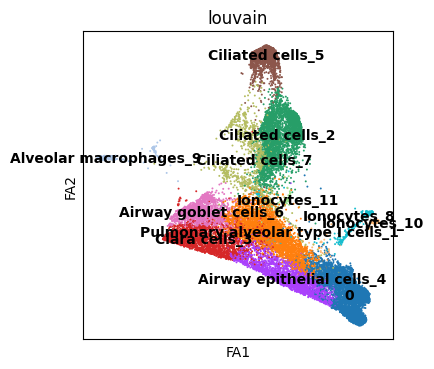

In [ ]:
sc.pl.draw_graph(adata3, color= "louvain", legend_loc= 'on data', size= 8)

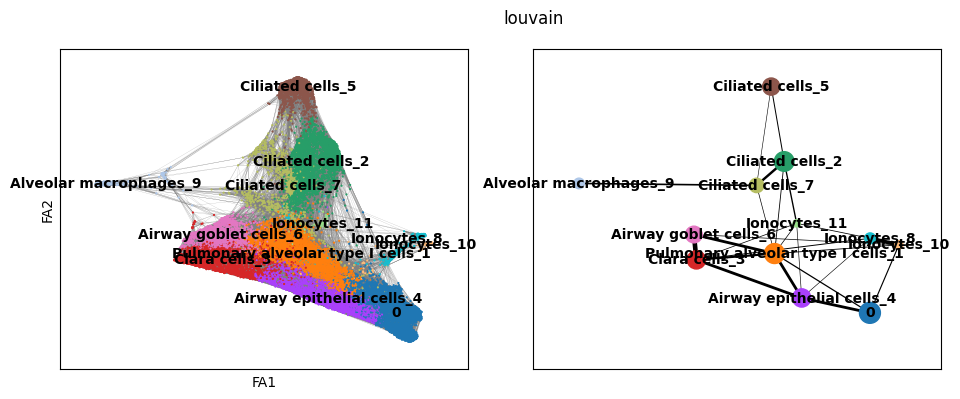

[<Axes: xlabel='FA1', ylabel='FA2'>, <Axes: >]

In [ ]:
plt.rcParams["figure.figsize"]= (5,4)
sc.pl.paga_compare(adata3, threshold = 0.05, frameon= True, edges= True, size = 10)

In [ ]:
import numpy as np
adata3.uns['iroot'] = np.flatnonzero(adata3.obs['louvain']== 'Airway epithelial cells_4' )[0]
sc.tl.dpt(adata3)

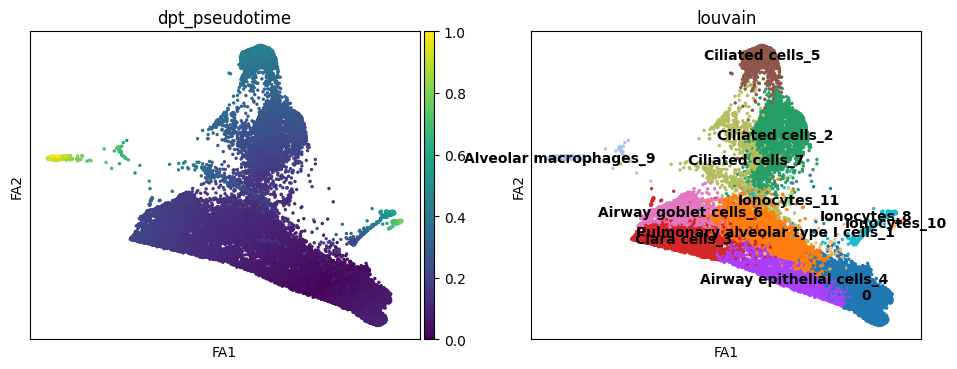

In [ ]:
sc.pl.draw_graph(adata3, color = ['dpt_pseudotime', 'louvain'], legend_loc='on data', size = 24)

MOCK

In [ ]:
mkdir -p GSM5082289_mock

In [ ]:
import scanpy as sc
import anndata as ad


In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE166nnn/GSE166766/suppl/GSE166766_RAW.tar -O GSE166766_RAW.tar


In [ ]:
!tar -xvf GSE166766_RAW.tar

In [ ]:
!mv GSM5082289_mock_barcodes.tsv.gz GSM5082289_mock/barcodes.tsv.gz
!mv GSM5082289_mock_features.tsv.gz GSM5082289_mock/features.tsv.gz
!mv GSM5082289_mock_matrix.mtx.gz GSM5082289_mock/matrix.mtx.gz

In [ ]:
mock = sc.read_10x_mtx('/content/GSM5082289_mock')

In [ ]:
mock.shape

In [ ]:
mock.obs.head()

In [ ]:
mock.var_names

In [ ]:
mock.var['MT'] = mock.var_names.str.startswith('MT-')

In [ ]:
mt_genes = mock.var_names[mock.var['MT']]
mt_genes

In [ ]:
sc.pp.calculate_qc_metrics(mock, qc_vars= 'MT', inplace= True, log1p= True)

In [ ]:
sc.pl.violin(mock,"pct_counts_MT", jitter= 7, multi_panel= False)

In [ ]:
sc.pl.scatter(mock, "total_counts", "n_genes_by_counts", color= "pct_counts_MT")

In [ ]:
mock = mock[mock.obs.pct_counts_MT<10, :]

In [ ]:
sc.pl.scatter(mock, "total_counts", "n_genes_by_counts", color= "pct_counts_MT")

In [ ]:
sc.pp.filter_cells(mock, min_genes= 200)
sc.pp.filter_genes(mock, min_cells= 3)

In [ ]:
mock.layers["counts"] = mock.X.copy()

In [ ]:
sc.pp.normalize_total(mock, target_sum= 1e4)

In [ ]:
sc.pp.sqrt(mock)

In [ ]:
sc.tl.pca(mock,n_comps= 50)

In [ ]:
sc.pl.pca_variance_ratio(mock, n_pcs=10)

In [ ]:
sc.pp.neighbors(mock)

In [ ]:
sc.tl.umap(mock, min_dist=0.5)

In [ ]:
sc.pl.umap(mock)

In [ ]:
sc.pl.umap(mock, color= "ACE2",color_map="Reds")

In [ ]:
sc.tl.louvain(mock)

In [ ]:
sc.pl.umap(mock, color= "louvain")

In [ ]:
sc.pl.umap(mock, color= ["louvain", "ACE2"], color_map="Reds")

annotations

In [ ]:
import decoupler as dc

In [ ]:
markers = dc.op.resource(name= "PanglaoDB", organism= "human")
mark = markers[markers["organ"]=="Lungs"]
mark.head()

In [ ]:
mark = mark[mark["canonical_marker"]]
mark = mark[~mark.duplicated(["cell_type", "genesymbol"])]
mark = mark.rename(columns={'cell_type': 'source', 'genesymbol': 'target'})
mark = mark[["source", "target"]]
mark.head()

In [ ]:
dc.mt.ulm(mock, net= mark, tmin= 3)

In [ ]:
score = dc.pp.get_obsm(mock, key= 'score_ulm')
score

In [ ]:
mock.obsm["score_ulm"].head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sc.pl.violin(score, keys= "Ciliated cells", groupby="louvain")

In [ ]:
#rank genes for the  clusters
mock_rank = dc.tl.rankby_group(score, groupby="louvain", reference= "rest",method= "t-test_overestim_var")
mock_rank = mock_rank[mock_rank["stat"]>0]
mock_rank.head()

In [ ]:
cluster_annotations1 = mock_rank[mock_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [ ]:
cluster_annotations1

In [ ]:
sc.pl.umap(mock, color= "louvain", ncols= 1)